### Часть 1. EDA и Preprocessing

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
data = pd.read_csv("data\german_credit_data.csv")
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [275]:
data = data.drop(data.columns[0], axis=1)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [276]:
data.shape

(1000, 9)

In [277]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Следует отметить, что на сайте неверно указан тип данного прознака: *Checking account (numeric, in DM - Deutsch Mark)*. Но, на самом деле признак категориальный - см. вывод *data.describe()*.

In [278]:
data.empty

False

In [279]:
nan_count = data.isna().sum()
nan_count

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Признак *Saving accounts* - текущее состояние накопительного счёта. Логично предположить, что если состояние счёта не указано, то накоплений вероятно нет или сумма накоплений незначительная. Я предлагаю заменить значение NaN на 'none' (признак категориальный).

In [280]:
data['Saving accounts'] = data['Saving accounts'].apply(lambda x: 'none' if pd.isna(x) else x)
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Признак *Checking account* - состояние текущего (личного) счёта. Логично предположить, что если состояние текущего не указано, то счёта вероятно нет. Я предлагаю заменить значение NaN на 'none' (признак категориальный).

In [281]:
data['Checking account'] = data['Checking account'].apply(lambda x: 'none' if pd.isna(x) else x)
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [282]:
data['Saving accounts'].value_counts(normalize=True).sort_index()

Saving accounts
little        0.603
moderate      0.103
none          0.183
quite rich    0.063
rich          0.048
Name: proportion, dtype: float64

In [283]:
data['Checking account'].value_counts(normalize=True).sort_index()

Checking account
little      0.274
moderate    0.269
none        0.394
rich        0.063
Name: proportion, dtype: float64

In [284]:
data['Job'].value_counts(normalize=True).sort_index()

Job
0    0.022
1    0.200
2    0.630
3    0.148
Name: proportion, dtype: float64

In [285]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [286]:
data['Age'] = data['Age'].astype('float')
data['Credit amount'] = data['Credit amount'].astype('float')
data['Duration'] = data['Duration'].astype('float')

In [287]:
from sklearn.preprocessing import OrdinalEncoder

In [288]:
encoder = OrdinalEncoder().set_output(transform="pandas")
data = encoder.fit_transform(data)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,48.0,1.0,2.0,1.0,2.0,0.0,142.0,2.0,5.0
1,3.0,0.0,2.0,1.0,0.0,1.0,770.0,29.0,5.0
2,30.0,1.0,1.0,1.0,0.0,2.0,390.0,8.0,3.0
3,26.0,1.0,2.0,0.0,0.0,0.0,848.0,26.0,4.0
4,34.0,1.0,2.0,0.0,0.0,0.0,734.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...
995,12.0,0.0,1.0,1.0,0.0,2.0,310.0,8.0,4.0
996,21.0,1.0,3.0,1.0,0.0,0.0,661.0,21.0,1.0
997,19.0,1.0,2.0,1.0,0.0,2.0,69.0,8.0,5.0
998,4.0,1.0,2.0,0.0,0.0,0.0,332.0,27.0,5.0


In [289]:
data.dtypes

Age                 float64
Sex                 float64
Job                 float64
Housing             float64
Saving accounts     float64
Checking account    float64
Credit amount       float64
Duration            float64
Purpose             float64
dtype: object

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Housing'}>,
        <Axes: title={'center': 'Saving accounts'}>,
        <Axes: title={'center': 'Checking account'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Purpose'}>]], dtype=object)

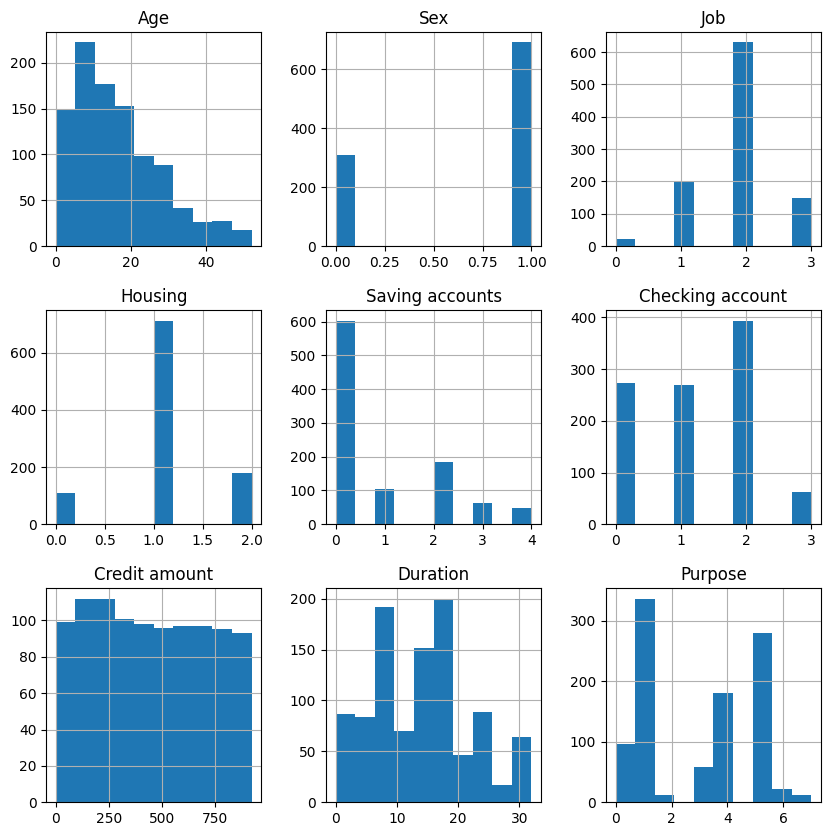

In [290]:
data.hist(figsize=(10,10))

<Axes: >

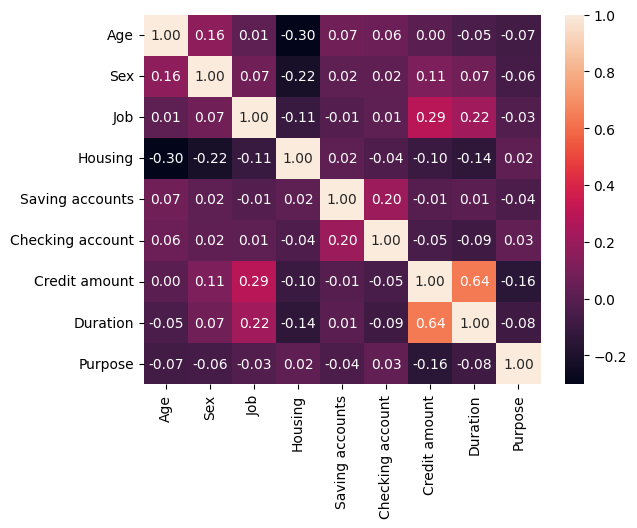

In [291]:
plt.figure()
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Есть несильная корреляция между *Credit Amount* и *Duration* . Она обяснима: больший кредит, как правило, даётся на больший срок. Оставляю признаки как есть. 

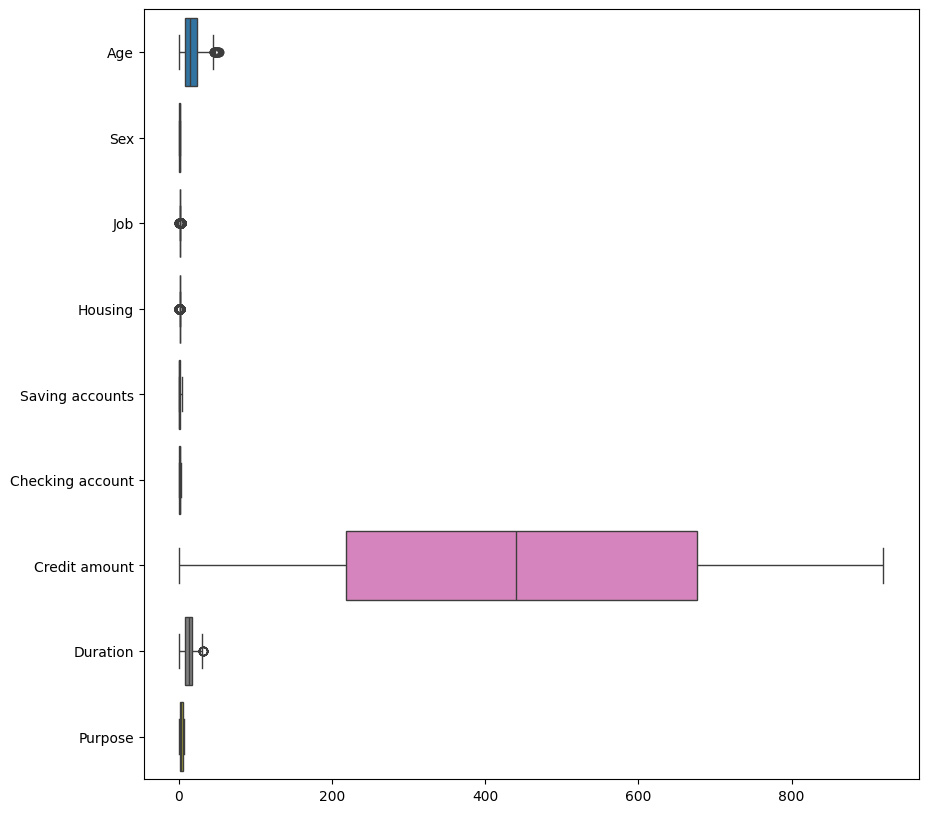

In [292]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

Ужасная диаграмма

In [293]:
from sklearn.preprocessing import MinMaxScaler

In [294]:
scaler = MinMaxScaler().set_output(transform="pandas")

In [295]:
data = scaler.fit_transform(data)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.923077,1.0,0.666667,0.5,0.50,0.000000,0.154348,0.06250,0.714286
1,0.057692,0.0,0.666667,0.5,0.00,0.333333,0.836957,0.90625,0.714286
2,0.576923,1.0,0.333333,0.5,0.00,0.666667,0.423913,0.25000,0.428571
3,0.500000,1.0,0.666667,0.0,0.00,0.000000,0.921739,0.81250,0.571429
4,0.653846,1.0,0.666667,0.0,0.00,0.000000,0.797826,0.53125,0.142857
...,...,...,...,...,...,...,...,...,...
995,0.230769,0.0,0.333333,0.5,0.00,0.666667,0.336957,0.25000,0.571429
996,0.403846,1.0,1.000000,0.5,0.00,0.000000,0.718478,0.65625,0.142857
997,0.365385,1.0,0.666667,0.5,0.00,0.666667,0.075000,0.25000,0.714286
998,0.076923,1.0,0.666667,0.0,0.00,0.000000,0.360870,0.84375,0.714286


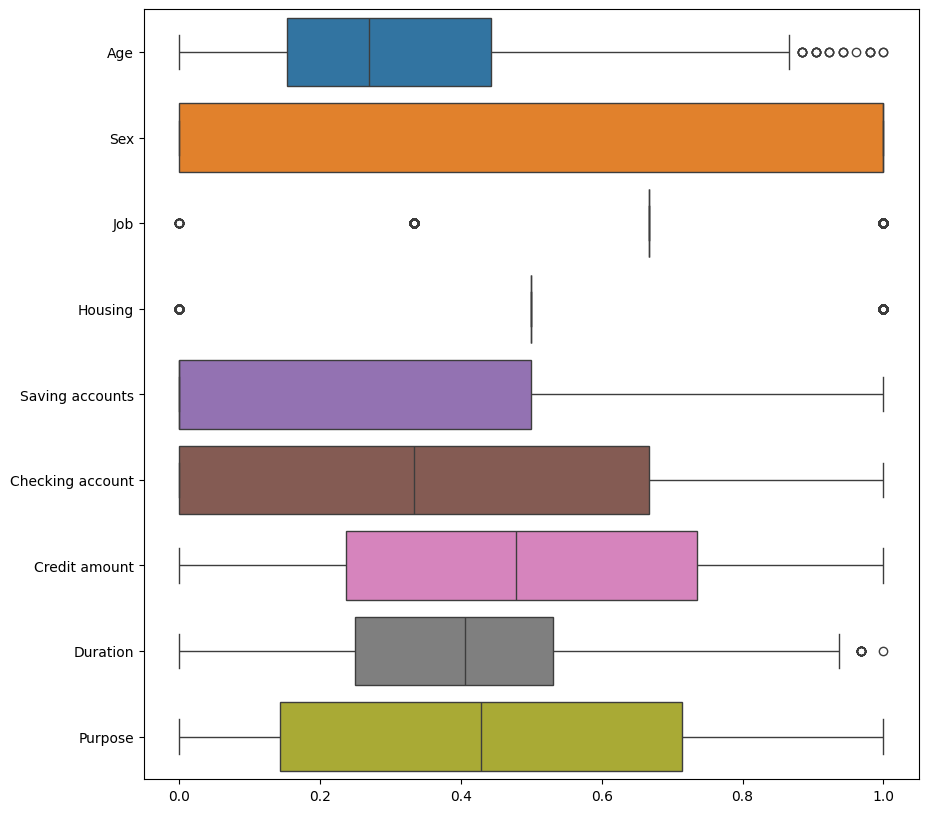

In [296]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

In [297]:
from sklearn.manifold import TSNE

In [298]:
tsne = TSNE(n_components=2, random_state=13)
data_tsne = tsne.fit_transform(data)
data_tsne.shape

(1000, 2)

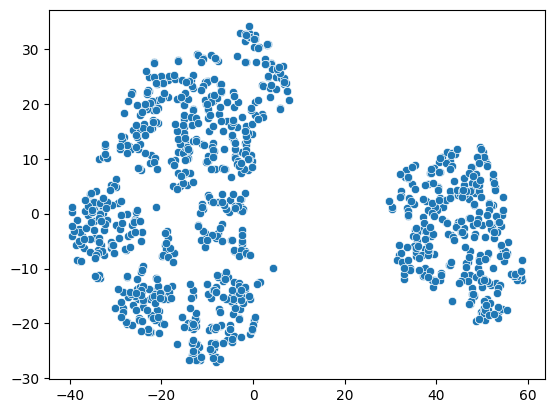

In [299]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1]);